# Proyecto Final - Redes Neuronales Feed Forward (MLP)
##### Curso: Statistical Learning

## Desarrollo del Problema

**Objetivo general:** Se tiene una compañía de seguros que ha brindado seguros médicos a sus clientes, ahora necesitan su ayuda para construir un modelo para predecir si los asegurados (clientes) del año pasado también estarán interesados en el seguro para vehículos provisto por la compañía.

**Información general:**
Una póliza de seguro es un acuerdo mediante el cual una empresa se compromete a proporcionar una garantía de compensación por una pérdida, daño, enfermedad o muerte específicos a cambio del pago de una prima específica. Una prima es una suma de dinero que el cliente debe pagar regularmente a una compañía de seguros por esta garantía.

Por ejemplo, puede pagar una prima de Rs. 5000 cada año para una cobertura de seguro médico de Rs. 200,000 / - de modo que si, Dios no lo quiera, se enferma y necesita ser hospitalizado ese año, la compañía aseguradora asumirá el costo de la hospitalización, etc. por hasta Rs. 200.000. Ahora, si se pregunta cómo puede la empresa soportar un costo de hospitalización tan alto cuando cobra una prima de solo Rs. 5000 / -, ahí es donde entra en escena el concepto de probabilidades. Por ejemplo, como usted, puede haber 100 clientes que pagarían una prima de Rs. 5000 cada año, pero solo algunos de ellos (digamos 2-3) serían hospitalizados ese año y no todos. De esta forma, todos comparten el riesgo de todos los demás.

Al igual que el seguro médico, existe un seguro de vehículo en el que cada año el cliente debe pagar una prima de cierta cantidad a la compañía aseguradora para que, en caso de un accidente desafortunado con el vehículo, la compañía aseguradora proporcione una compensación (llamada 'suma asegurada' ) al cliente.

La creación de un modelo para predecir si un cliente estaría interesado en el seguro de vehículos es extremadamente útil para la empresa porque, en consecuencia, puede planificar su estrategia de comunicación para llegar a esos clientes y optimizar su modelo comercial y sus ingresos.

Ahora, para predecir si el cliente estaría interesado en el seguro del vehículo, tiene información sobre los datos demográficos (sexo, edad, tipo de código de región), vehículos (antigüedad del vehículo, daños), póliza (prima, canal de abastecimiento), etc.

## Carga de Datos

El Dataset contendrá la siguiente información:
* **id:** ID único para el cliente
* **Gender:** Género del cliente
* **Age:** Edad del cliente
* **Driving_License:** 0: el cliente no tiene DL, 1: el cliente ya tiene DL
* **Region_Code:** Código único para la región del cliente
* **Previously_Insured:** 1: el cliente ya tiene seguro de vehículo, 0: el cliente no tiene seguro de vehículo
* **Vehicle_Age:** Antigüedad del vehículo
* **Vehicle_Damage:** 1: El cliente ha dañado su vehículo en el pasado. 0: El cliente no ha dañado su vehículo en el pasado.
* **Annual_Premium:** La cantidad que el cliente debe pagar como prima en el año.
* **PolicySalesChannel:** Código anónimo para el canal de alcance al cliente, es decir. Diferentes agentes, por correo, por teléfono, en persona, etc.
* **Vintage:** Número de días, el cliente se ha asociado con la empresa;
* **Response:** 1: el cliente está interesado, 0: el cliente no está interesado

In [62]:
##Importamos algunas librerias que nos servirán en el desarrollo del problema
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop
from keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping

Cargamos la Data.

In [5]:
Full_data = pd.read_csv("dataset/dataInsurance.csv")

##Verificamos que haya cargado la información, y que tenga la forma requerida
print('Rango Tensor:',Full_data.ndim)
print('Forma Tensor:',Full_data.shape)
print('Vemos los primeros registros de la data:')
Full_data.head()

Rango Tensor: 2
Forma Tensor: (381109, 12)
Vemos los primeros registros de la data:


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Análisis Preliminar de los Datos

Obtenemos un listado de las variables y la distribución estadistica de las variables no categoricas.

In [6]:
##Algunos metodos importantes
Full_data.info()
Full_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Se hace el análisis de la correlación entre los datos.

In [7]:
Full_data[['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']].corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


Para las columnas no númericas, vemos de forma general el contenido de los mismos.

**1. Gender** 

In [8]:
#Vemos los datos que almacena esta columna
Full_data['Gender'].unique()   

array(['Male', 'Female'], dtype=object)

In [9]:
#Vemos si hay datos Nulos
Full_data['Gender'].isna().sum()  

0

**2. Vehicle_Age** 

In [10]:
#Vemos los datos que almacena esta columna
Full_data['Vehicle_Age'].unique()   

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [11]:
#Vemos si hay datos Nulos
Full_data['Vehicle_Age'].isna().sum()  

0

**3. Vehicle_Damage** 

In [12]:
#Vemos los datos que almacena esta columna
Full_data['Vehicle_Damage'].unique()   

array(['Yes', 'No'], dtype=object)

In [13]:
#Vemos si hay datos Nulos
Full_data['Vehicle_Damage'].isna().sum()  

0

#### Datos a Utilizar

No todos los datos son representativos, se quitaran aquellos datos que son únicos por registro o que por el momento no ayudarán en nada al modelo. Por el momento únicamente el ID. Además se separaran las variables dependientes de la independiente.

In [14]:
##Separamos las Variables Independientes de la variable que vamos a estimar
X = Full_data.drop(['id','Response'], axis=1)
Y = Full_data['Response'].values

## Feature Engineering 

Se transformaran los datos para mejorar el entrenamiento del modelo, así como manejar su manipulación entre los diferentes modelos.

### Transformación variables Categóricas

Para facilitar el trabajo con los diferentes modelos, se transformaran los datos para permitir una mejor manipulación de las variables Categoricas.

1. Se transformará la variable Independiente -> Gender

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
Gender_cat = Full_data['Gender']
Gender_cat_encoded = encoder.fit_transform(Gender_cat)
print('Revisamos como clasifico los labels {}'.format(encoder.classes_))
Gender_labels= {0 : 'Female', 1: 'Male'}
print('Para posterior conversión los dejamos en un diccionario {}'.format(Gender_labels))

Revisamos como clasifico los labels ['Female' 'Male']
Para posterior conversión los dejamos en un diccionario {0: 'Female', 1: 'Male'}


Almacenamos esta información en la Variable X, ya transformado.

In [16]:
##Quitamos la columna que ya existe de passenger_sex
X=X.drop(['Gender'], axis=1)
##Colocamos la nueva columna
X['Gender'] =Gender_cat_encoded

2. Se transformará la variable Independiente-> Vehicle_Age

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
Vehicle_Age_cat = Full_data['Vehicle_Age']
Vehicle_Age_encoded = encoder.fit_transform(Vehicle_Age_cat)
print('Revisamos como clasifico los labels {}'.format(encoder.classes_))
Vehicle_Age_labels= {0 : '1-2 Year', 1: '< 1 Year', 2: '> 2 Years'}
print('Para posterior conversión los dejamos en un diccionario {}'.format(Vehicle_Age_labels))

Revisamos como clasifico los labels ['1-2 Year' '< 1 Year' '> 2 Years']
Para posterior conversión los dejamos en un diccionario {0: '1-2 Year', 1: '< 1 Year', 2: '> 2 Years'}


In [18]:
##Quitamos la columna que ya existe de passenger_sex
X=X.drop(['Vehicle_Age'], axis=1)
##Colocamos la nueva columna
X['Vehicle_Age'] =Vehicle_Age_encoded

3. Se transformará la variable Independiente-> Vehicle_Damage

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
Vehicle_Damage_cat = Full_data['Vehicle_Damage']
Vehicle_Damage_encoded = encoder.fit_transform(Vehicle_Damage_cat)
print('Revisamos como clasifico los labels {}'.format(encoder.classes_))
Vehicle_Damage_labels= {0 : 'No', 1: 'Yes'}
print('Para posterior conversión los dejamos en un diccionario {}'.format(Vehicle_Damage_labels))

Revisamos como clasifico los labels ['No' 'Yes']
Para posterior conversión los dejamos en un diccionario {0: 'No', 1: 'Yes'}


In [20]:
##Quitamos la columna que ya existe de passenger_sex
X=X.drop(['Vehicle_Damage'], axis=1)
##Colocamos la nueva columna
X['Vehicle_Damage'] =Vehicle_Damage_encoded

### Normalización de Datos

Usamos scikitLearn para Normalizar todos los datos.

In [21]:
from sklearn.preprocessing import StandardScaler

#Se setea el scaler
scaler = StandardScaler()
scaler.fit(X)

#Se transforma los datos
X_Norm=scaler.transform(X)
X_Norm=pd.DataFrame(X_Norm, columns = X.columns)
X_Norm.shape

(381109, 10)

Algunas estadisticas para los datos transformados

In [22]:
X_Norm.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Age,Vehicle_Damage
count,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05
mean,-1.148103e-16,-9.322227e-16,1.230509e-17,7.849158e-17,1.383391e-17,-7.644074e-17,-9.612889e-17,9.687465e-17,3.907800e-17,7.273056e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.213453e+00,-2.164130e+01,-1.994638e+00,-9.196380e-01,-1.622853e+00,-2.048455e+00,-1.725174e+00,-1.085134e+00,-8.938731e-01,-1.009801e+00
25%,-8.911132e-01,4.620794e-02,-8.608404e-01,-9.196380e-01,-3.578308e-01,-1.531887e+00,-8.646631e-01,-1.085134e+00,-8.938731e-01,-1.009801e+00
50%,-1.819661e-01,4.620794e-02,1.217845e-01,-9.196380e-01,6.417254e-02,3.867931e-01,-4.151927e-03,9.215448e-01,-8.938731e-01,9.902940e-01
75%,6.561169e-01,4.620794e-02,6.508902e-01,1.087384e+00,5.133064e-01,7.373213e-01,8.683108e-01,9.215448e-01,8.371385e-01,9.902940e-01
max,2.976962e+00,4.620794e-02,1.935861e+00,1.087384e+00,2.960534e+01,9.402586e-01,1.728822e+00,9.215448e-01,2.568150e+00,9.902940e-01


## Separara Datos de Entrenamiento/Validación/Pruebas

Usaremos scikitLearn para hacer la separación de los dataset.
* Entrenamiento (Train) (80%)
* Validación (Cross Validation) (10%)
* Pruebas (Test)(20%) 

In [23]:
from sklearn.model_selection import train_test_split

##Hacemos la separación de los data sets
X_Ttrain, X_test, y_Ttrain, y_test = train_test_split(X_Norm,Y,test_size=0.2,random_state=21, stratify=Y)
##Volvemos a dividir el de Train para tener otro para Cross-validation
X_train, X_Validation, y_train, y_Validation = train_test_split(X_Ttrain,y_Ttrain,test_size=0.11,random_state=21, stratify=y_Ttrain)

## Creación de Módelos

Creamos nuestro modelo base de la Red Neuronal Secuencial usando Keras.

In [89]:
from keras.layers import BatchNormalization,Activation

#Estructura base - Usaremos el modelo base Sequential de Keras
cnn = Sequential()

#red neuronal -> Fully Connected
cnn.add(Dense(units=16,input_shape=(X_train.shape[-1],),kernel_regularizer='l2'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
#Aplicamos Dropout - Para regularización de Nuestra Red Neuronal
cnn.add(Dropout(0.5))

cnn.add(Dense(units=32,activation="relu",kernel_regularizer='l2'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))

#Aplicamos Dropout - Para regularización de Nuestra Red Neuronal
cnn.add(Dropout(0.5))

#capa de salida, para clasificación binaria. 
cnn.add(Dense(units=1, activation="sigmoid"))

Definimos los Hiperparametros para nuestro entrenamiento del modelo y se compila el modelo.

In [90]:
#Definimos los hiperparametros
EPOCHS = 10     #Cantidad de EPOCHS
BS = 20         #Batch Size
#compilar la red
cnn.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

Mostramos el Detalle del Modelo creado.

In [72]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                176       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_3 (Activation)    (None, 32)               

#### Entrenamiento del Modelo

Entrenaremos el Modelo creado.

Tomar en Consideración:
* Se usará **Tensorboard** _(por medio de un callback)_ para ir almacenando las metricas del entrenamiento.
* Se usará **Checkpoints** _(por medio de un callback)_ para almacenar los mejores modelos entrenados, y no volver a repetir entrenamientos.
* Se implementará **Early Stop** _(por medio de un callback)_ para detener el entrenamiento al no mejorar despues de N Epochs.

1. Definición de Callbacks

In [91]:
#Libreria para Timestamp del Proceso y acceso a Sistema
import time
import os

# Nombre Modelo Entrenado - para Checkpoints y log tensorboard
model_name = "Sequential"

#########################
# Callbacks
#########################
#CallBack para almacenar el Log en Tensorboard
strConf=time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+model_name
tensorboard = TensorBoard(log_dir =os.path.join("logsP1", model_name),histogram_freq = 1,profile_batch = '500,520')
#CallBack para almacenar el log en 
checkpoint = ModelCheckpoint(os.path.join("CheckpointsP1", f"{model_name}" + "-loss-{val_loss:.2f}.h5"),
                            save_best_only=True,
                            verbose=1)
#Callbak para Early Stopping
EarlyStop = EarlyStopping(monitor='loss', patience=3)

# Sino esta creado el Folder para los checkpoints- Lo creamos
if not os.path.isdir("CheckpointsP1"):
    os.mkdir("CheckpointsP1")

2. Entrenamiento del Modelo.

In [92]:
H=cnn.fit(X_train.values, y_train, 
        steps_per_epoch= 20,
        epochs=EPOCHS,
        validation_data=(X_test.values, y_test),
        verbose=1, callbacks=[tensorboard, checkpoint,EarlyStop])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.8955 - accuracy: 0.7292
Epoch 00001: val_loss improved from inf to 0.73132, saving model to CheckpointsP1\Sequential-loss-0.73.h5
20/20 [==============================] - 11s 566ms/step - loss: 0.8955 - accuracy: 0.7292 - val_loss: 0.7313 - val_accuracy: 0.8774
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.7668 - accuracy: 0.7983
Epoch 00002: val_loss improved from 0.73132 to 0.65821, saving model to CheckpointsP1\Sequential-loss-0.66.h5
20/20 [==============================] - 8s 410ms/step - loss: 0.7668 - accuracy: 0.7983 - val_loss: 0.6582 - val_accuracy: 0.8774
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.8308
Epoch 00003: val_loss improved from 0.65821 to 0.60029, saving model to CheckpointsP1\Sequential-loss-0.60.h5
20/20 [==============================] - 8s 382ms/step - loss: 0.6842 - accuracy: 0.8308 - val_loss: 0.6003 - val_accuracy: 0.877

_Nota: Vemos que el modelo con la data de Training consiguio una exactitud (Accuracy) del 88%, lo cual esta bastante bien._

Mostramos los resultados del Entrenamiento en Tensorboard.

**Metricas (Scalars):**
<img src="assets/metricsSequentialtest.jpg">

Tambien es facilmente visualizable por medio del History.

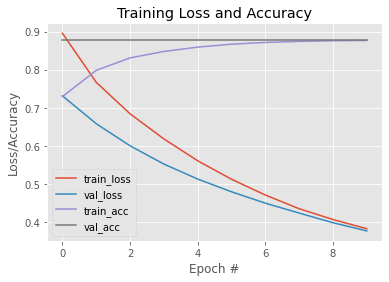

In [93]:
# Graficamos la perdida(loss) y exactitud(accuracy) de la data de entrenamiento y pruebas
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

Mostramos como quedan los checkpoints almacenados, para en algún momento ya utilizar estos modelos ya entrenados.
<img src="assets/sequentialcheckpoints.jpg">

#### Almacenamos el Modelo entrenado

Se almacena el modelo entrenado para que pueda ser utilizado posteriormente para predicción.

In [95]:
cnn.save("finalModels/Insurance_predictor.model", save_format="h5")

_Nota: Tambien se pudieron utilizar los checkpoints ya almacenados._

### Cross-Validation _(Prueba Deployment)_

Ya se entreno el modelo y ya se ajustaron los hiperparametros para tener buenos resultados con la data de entrenamiento y con la data de Test; ahora para realizar una validación cruzada (cross-validation) y ver la capacidad de predicción del modelo sobre datos nunca vistos.

_**Nota:** Se cargará el modelo almacenado y no se usará el modelo cargado en memoria, con dos objetivos:_
* _Mostrar el Deployment del modelo._
* _No depender de la ejecución de todo el notebook para realizar la comprobación_

1. Cargamos el modelo ya entrenado.

In [98]:
##Cargamos el Modelo Entrenado
from tensorflow.keras.models import load_model

#Cargamos nuestros modelo entrenado para la detección de mascarrillas
Insurance_Model = load_model("finalModels/Insurance_predictor.model")

2. Realizamos la predicción con los datos de Validación.

In [167]:
#usamos el Modelo ya entrenado para predecir los datos de Validacion
y_hat=Insurance_Model.predict(X_Validation)

In [168]:
#Al ser Sigmoid la función de activación de la última neurona, nos devolverá una probabilidad
#Rendondemos a partir de 0.50 como umbral
y_hat=y_hat.round()

In [177]:
from sklearn.metrics import classification_report

#Imprimimos el Reporte de Clasificación
print(classification_report(y_Validation, y_hat))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     29427
           1       1.00      0.66      0.80      4111

    accuracy                           0.96     33538
   macro avg       0.98      0.83      0.89     33538
weighted avg       0.96      0.96      0.95     33538



_Nota: Vemos que el modelo con la data de Validación (Cross-Validation) consiguio una exactitud (Accuracy) arriba del del 90%, con un f1-score bastante bueno._